In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf


In [2]:
(x_train , y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print("Shape Train: ", x_train.shape , y_train.shape )
print("Shape Test: ", x_test.shape,y_test.shape)

Shape Train:  (60000, 28, 28) (60000,)
Shape Test:  (10000, 28, 28) (10000,)


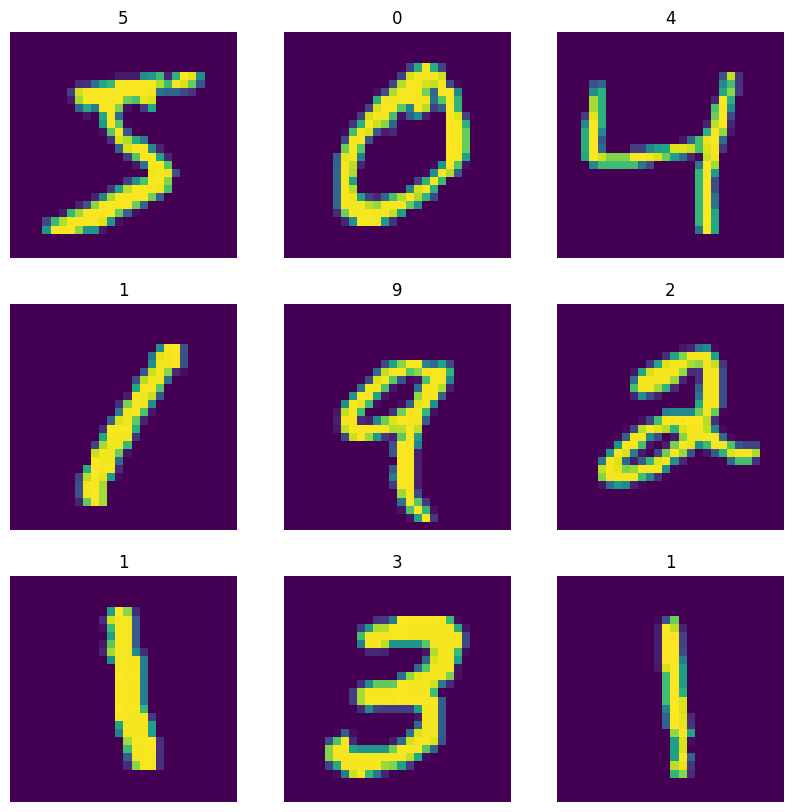

In [4]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis(False)
plt.show()

Dự kiến tạo 2 hidden layer  
Khởi tạo trọng số :
- W1 , b1 , W2 , b2 


x.shape = 28 * 28 = 784 * m

z1 = w1*X + b1 
a1 = reLu(w1)

z2 = w2*a1 + b2 
a2 = softmax(z2)





In [7]:
"""
khởi tạo một số activation 
"""
def relu(x):
    return np.maximum(0,x)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [9]:
def init_parameter():
    W1 = np.random.rand(10,784)  - 0.5
    b1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) -0.5
    return W1,b1,W2,b2 

def forward(W1,b1,W2,b2,X):
    z1 = np.dot(W1,X) + b1      ## (50,784)*(784,m) + (50,1)  -> (50,m)
    a1 = relu(z1)            ## (50,m)
    z2 = np.dot(W2,a1) + b2     ## (10,50)* (50,m) + (10,1) -> (10,m)
    a2 = softmax(z2)         ## (10,m)
    return z1,a1,z2,a2 
def relu_gra(x):
    return x > 0
def backprop(z1,a1,z2,a2,W1,W2,X,Y):
    m = X.shape[1]
    dz2 = a2 - Y             ## (10,m) - (10,m) --> (10,m)
    dW2 = (1/m) * np.dot(dz2,a1.T)          ## (10,m) * (m,50) --> (10,50)
    db2 = (1/m)* np.sum(dz2)                           ##   dz2 = (10,m)  -> db2 = (10,1)                       

    dz1 = np.dot(W2.T,dz2) * relu_gra(z1)        ##  (50,10) * (10,m)   = (50,m)       
    dW1 = (1/m)* np.dot(dz1,(X.T))                                 ##  (50,m)  * (m,784)     = (50,784)
    db1 = (1/m)*np.sum(dz1)                                        ##  (50,m)                       = (50,1)
    return dW1 , db1 , dW2 , db2 
def update_param(W1, b1 , W2 , b2 , dW1 , db1 , dW2 , db2,alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1,b1,W2,b2

def get_predict(a2):
    return np.argmax(a2,0)
def gradient(X,Y,alpha,iters):
    W1,b1,W2,b2 = init_parameter()
    for i in range(iters):
        z1 , a1 ,z2 , a2 = forward(W1,b1,W2,b2,X)
        dW1 , db1 , dW2 , db2 = backprop(z1,a1,z2,a2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_param(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    return W1 , b1 , W2 , b2 
    



In [10]:
from sklearn.preprocessing import LabelBinarizer

In [11]:
one_hot = LabelBinarizer()
y_train = one_hot.fit_transform(y_train)

In [12]:
y_train.shape

(60000, 10)

In [13]:
x_train = x_train.reshape(60000,784)

In [14]:
x_train.shape , y_train.shape

((60000, 784), (60000, 10))

In [15]:
x_train = x_train[:,:1000]
y_train = y_train[:,:1000]

In [16]:
x_train = x_train/255.

In [17]:
x_train = x_train.T

In [18]:
y_train = y_train.T

In [19]:
W1,b1,W2,b2 = gradient(x_train,y_train,0.1,500)

In [20]:
def make_predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predict(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predict(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[:,index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  [0 0 0 0 0 1 0 0 0 0]


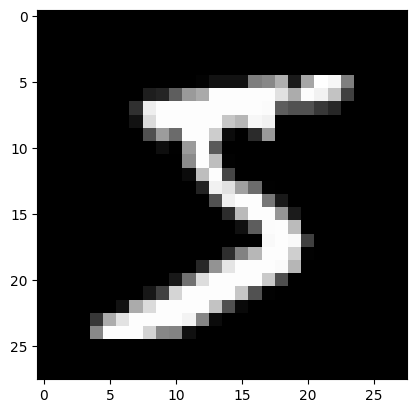

Prediction:  [0]
Label:  [1 0 0 0 0 0 0 0 0 0]


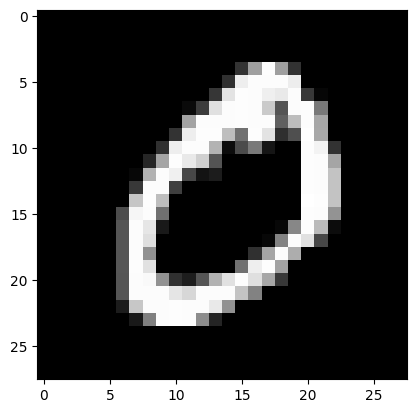

Prediction:  [4]
Label:  [0 0 0 0 1 0 0 0 0 0]


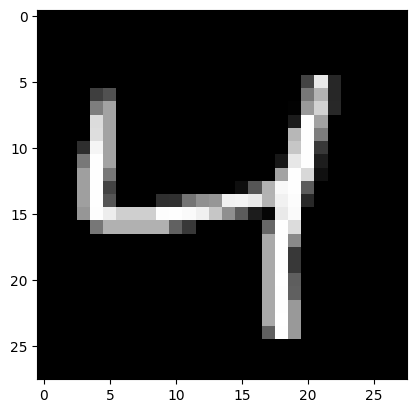

Prediction:  [1]
Label:  [0 1 0 0 0 0 0 0 0 0]


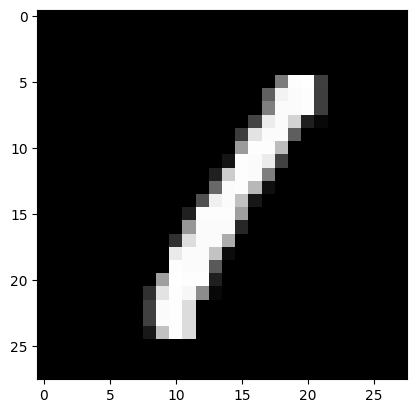

Prediction:  [9]
Label:  [0 0 0 0 0 0 0 0 0 1]


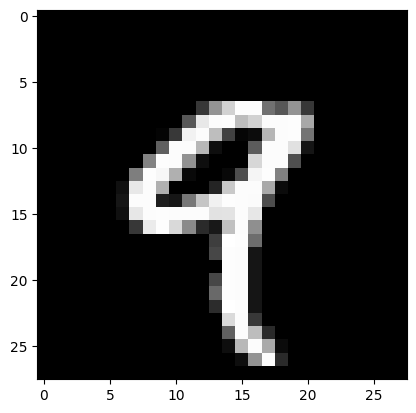

Prediction:  [2]
Label:  [0 0 1 0 0 0 0 0 0 0]


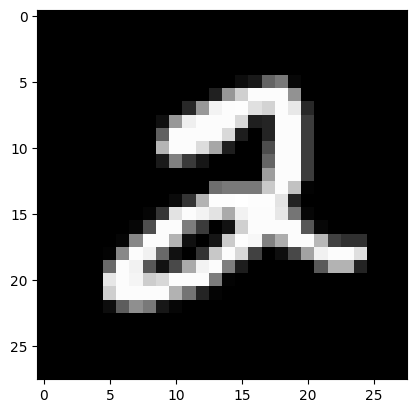

Prediction:  [1]
Label:  [0 1 0 0 0 0 0 0 0 0]


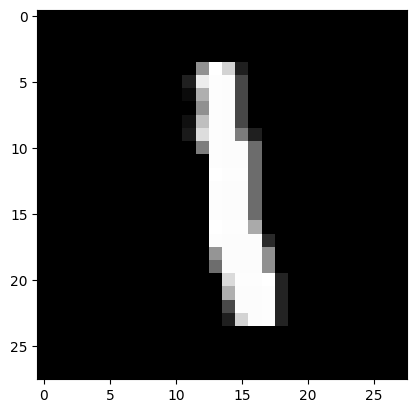

Prediction:  [3]
Label:  [0 0 0 1 0 0 0 0 0 0]


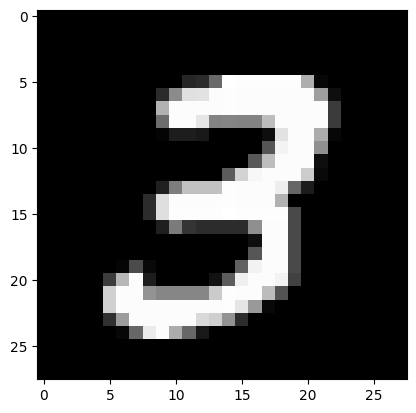

Prediction:  [1]
Label:  [0 1 0 0 0 0 0 0 0 0]


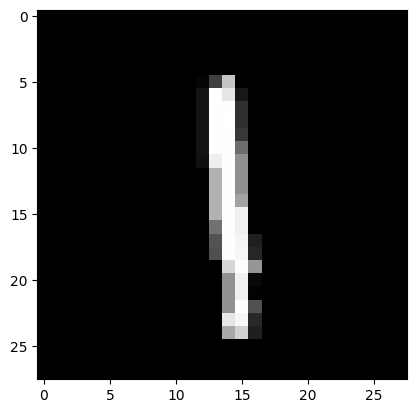

Prediction:  [4]
Label:  [0 0 0 0 1 0 0 0 0 0]


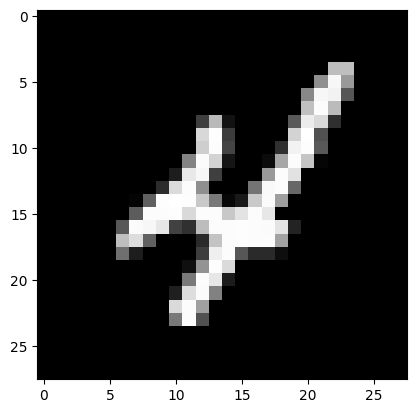

In [22]:
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)